In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
Consumer_Key = "mCznOep9anOWQeKkd53NW9Dr9"
Consumer_Secret_Key = "M7qRyA1VVYSepifWOZmB3mMOMG8sqWGdPl7PrCTi8e6cWCWwUe" 
Access_Token = "1592194033363087361-EaVKFea037FXvwef1JyVrjOJSGYsaL"
Access_Token_Secret = "WnmqRre9Q8Trl5xXxJEEolc8nSsEkdqxabPt6mdvJnF9P"

In [11]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [33]:
posts = api.user_timeline(screen_name="LazadaIDCare", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) @xixiute Lex ID itu asalah satu jasa pengiriman yang tersedia di Lazada ya Kak

2) @ajejengns Hai Kak Ajeng. DMnya sudah kami respon ya, silakan di cek.

3) @hosh_universe Sudah direspon ya Kak, yuk kita lanjut di DM.

4) @xixiute Hai Lazadian, untuk menjaga keamanan datanya yuk infokan terlebih dahulu nomor pesanan dan nama pemesan melalui DM ya, agar dibantu cek lebih lanjut.

5) @totoraharto2 Ok Kak, semoga prosesnya berjalan lancar yah. Kakak juga bisa kok cek proses follow upnya di akun dengan cara klik akun pilih pusat bantuan klik tiket keluhan saya.



In [34]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@xixiute Lex ID itu asalah satu jasa pengirima...
1,@ajejengns Hai Kak Ajeng. DMnya sudah kami res...
2,"@hosh_universe Sudah direspon ya Kak, yuk kita..."
3,"@xixiute Hai Lazadian, untuk menjaga keamanan ..."
4,"@totoraharto2 Ok Kak, semoga prosesnya berjala..."


In [35]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Lex ID itu asalah satu jasa pengiriman yang t...
1,"Hai Kak Ajeng. DMnya sudah kami respon ya, si..."
2,"_universe Sudah direspon ya Kak, yuk kita lanj..."
3,"Hai Lazadian, untuk menjaga keamanan datanya ..."
4,"Ok Kak, semoga prosesnya berjalan lancar yah...."
...,...
195,"Hi Lazadian maaf late respon ya, Untuk DM nya..."
196,"Hi Kak Rifka maaf late respon ya, Endrick inf..."
197,"_icecream Hai Lazadian, maaf udah buat kecewa ..."
198,"Hai Kak Dika, sudah Claudia respon DM Twitter..."


In [36]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Lex ID itu asalah satu jasa pengiriman yang t...,0.0,0.00
1,"Hai Kak Ajeng. DMnya sudah kami respon ya, si...",0.0,0.00
2,"_universe Sudah direspon ya Kak, yuk kita lanj...",0.0,0.00
3,"Hai Lazadian, untuk menjaga keamanan datanya ...",0.0,0.00
4,"Ok Kak, semoga prosesnya berjalan lancar yah....",0.5,0.50
...,...,...,...
195,"Hi Lazadian maaf late respon ya, Untuk DM nya...",0.6,-0.30
196,"Hi Kak Rifka maaf late respon ya, Endrick inf...",0.8,0.25
197,"_icecream Hai Lazadian, maaf udah buat kecewa ...",0.0,0.00
198,"Hai Kak Dika, sudah Claudia respon DM Twitter...",0.0,0.00


<function matplotlib.pyplot.show(*args, **kw)>

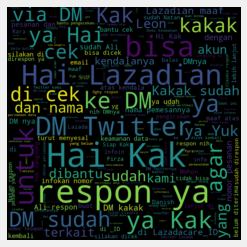

In [37]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=700, height=700, random_state=10, max_font_size=100).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [38]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Lex ID itu asalah satu jasa pengiriman yang t...,0.0,0.00,Neutral
1,"Hai Kak Ajeng. DMnya sudah kami respon ya, si...",0.0,0.00,Neutral
2,"_universe Sudah direspon ya Kak, yuk kita lanj...",0.0,0.00,Neutral
3,"Hai Lazadian, untuk menjaga keamanan datanya ...",0.0,0.00,Neutral
4,"Ok Kak, semoga prosesnya berjalan lancar yah....",0.5,0.50,Positive
...,...,...,...,...
195,"Hi Lazadian maaf late respon ya, Untuk DM nya...",0.6,-0.30,Negative
196,"Hi Kak Rifka maaf late respon ya, Endrick inf...",0.8,0.25,Positive
197,"_icecream Hai Lazadian, maaf udah buat kecewa ...",0.0,0.00,Neutral
198,"Hai Kak Dika, sudah Claudia respon DM Twitter...",0.0,0.00,Neutral


In [39]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

6)  Hai Kak Toto, Natan turut menyesal nih buat kendala pengembalian produknya :( huft. Natan cek di tiket 2500000095053627, keluhan Kakak masih di follow up nih. Ditunggu dulu yah buat updatenya via email dan nomor telepon.

7)  Hai Lazadian, Natan turut menyesal nih produknya yang terima orang lain :( huft. Infoin yuk detail pesanannya ke DM Twitter _ID, biar datanya aman nih.

8) _zuly Dengan berat hati Yura sampaikan tidak bisa diubah ya untuk data nomor hp nya :(

9)  Hi Lazadian maaf late respon ya, Untuk DM nya sudah mimin balas, silakan dicek



In [40]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199)  Ok Kak, semoga prosesnya berjalan lancar yah. Kakak juga bisa kok cek proses follow upnya di akun dengan cara klik akun pilih pusat bantuan klik tiket keluhan saya.

200)  Hai Lazadian, Natan turut menyesal nih buat kendala maen game Happy Matchnya. Infoin detail akunnya ke DM Twitter _ID, biar datanya aman nih.

201)  Thanks kak, saat ini kami bantu follow up ke tim terkait dinomor laporan 2500000093662542. Mohon ditunggu info selanjutnya via email atau telepon. Kakak juga bisa lakukan pengecekan untuk status laporan di aplikasi info lengkap di link 

202)  Sudah Yura balas DMnya ya, silakan dicek :)

203)  Leon lanjut ya Kak Ephadi. Thanks buat datanya dan mohon maaf atas keterlambatan pengiriman pesanannya. Terkait permasalahannya, apakah masih ada tombol "Batal" pada aplikasi Lazada nya?

204)  Rey lanjut ya kak Acep, maaf buat kecewa karena produk yang dijual sering kembali. Saat ini kakak terhubung dengan layanan khusus untuk Customer, Rey memilik

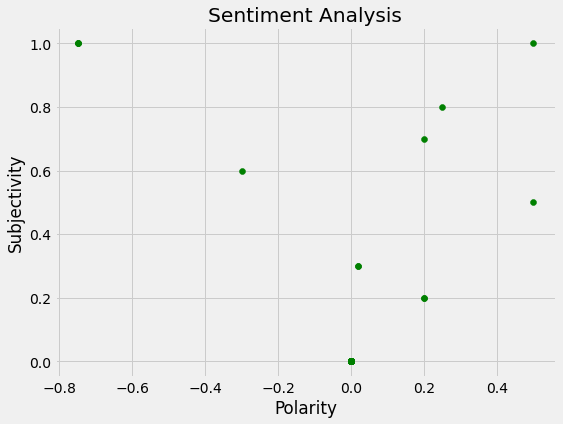

In [41]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [42]:
df['Analysis'].value_counts()

Neutral     188
Positive      8
Negative      4
Name: Analysis, dtype: int64

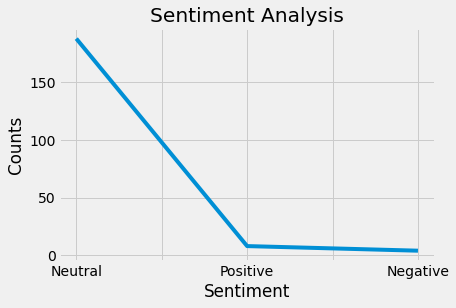

In [43]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

In [44]:
df['Analysis'].value_counts()

Neutral     188
Positive      8
Negative      4
Name: Analysis, dtype: int64

In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        200 non-null    object 
 1   Subjectivity  200 non-null    float64
 2   Polarity      200 non-null    float64
 3   Analysis      200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.038000,-0.003318
std,0.169409,0.111149
min,0.000000,-0.750000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,0.500000


In [46]:
df.duplicated().sum()

20

In [47]:
df.isnull().sum()

Tweets          0
Subjectivity    0
Polarity        0
Analysis        0
dtype: int64

In [48]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

In [49]:
df.corr()

,Subjectivity,Polarity
Subjectivity,1.000000,-0.326619
Polarity,-0.326619,1.000000


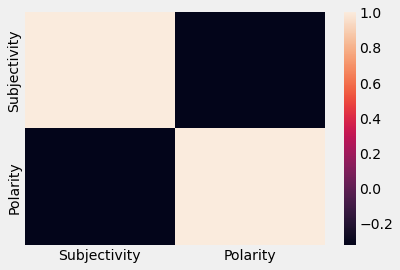

In [50]:
sns.heatmap(df.corr())